In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [14]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df_merged=pd.read_excel("D:/ai finance/hw4_my_data_my_model/data/data_merged.xlsx")
df_esf_clean=pd.read_excel("D:/ai finance/hw4_my_data_my_model/data/data_esf_clean.xlsx")
df_zu_clean=pd.read_excel("D:/ai finance/hw4_my_data_my_model/data/data_zu_clean.xlsx")

In [18]:
df_merged = df_merged[(df_merged['esf_count'] >= 3) & (df_merged['zu_count'] >= 3)]
print(f" {len(df_merged)} 个小区同时拥有充足二手房和租房数据用于后续分析。")
print(df_merged.head())

 173 个小区同时拥有充足二手房和租房数据用于后续分析。
   Unnamed: 0 region community_name  median_price_sqm  esf_count  \
0           0     世博         万科金色城品           89563.0          3   
1           1     世博           上南一村           52224.0         24   
2           2     世博           上南七村           46635.0         10   
3           3     世博           上南三村           51261.0         20   
4           4     世博           上南九村           52127.0         71   

   median_rent_sqm  zu_count  price_to_rent_ratio_direct  metro_dist_m_x  \
0       144.444444         4                  620.051538           459.0   
1       119.791271        34                  435.958308           224.0   
2       121.621622        20                  383.443333           782.0   
3       122.799550        14                  417.436385           432.0   
4        96.782597        46                  538.598898           286.0   

   metro_dist_m_y  
0           459.0  
1           224.0  
2           782.0  
3           432.0  
4   

task1：direct median

C:\Users\Rh\AppData\Local\Temp\ipykernel_80928\4228863182.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price_to_rent_ratio_direct', y='region', data=region_ratio, palette='viridis')


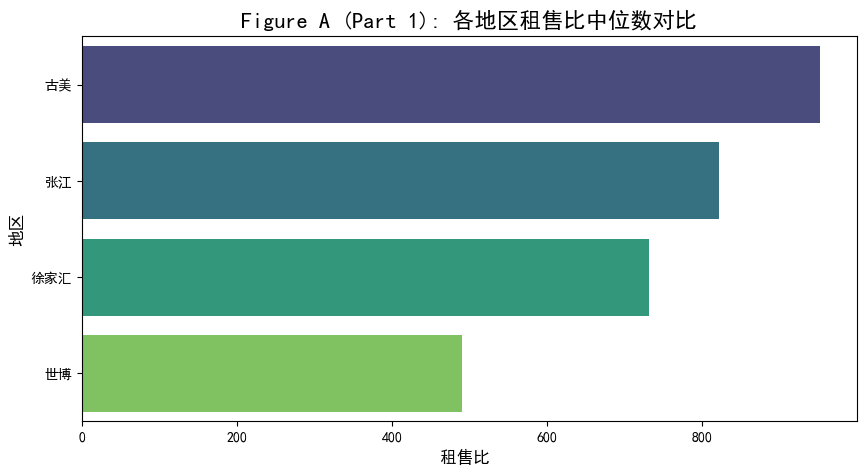

C:\Users\Rh\AppData\Local\Temp\ipykernel_80928\4228863182.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price_to_rent_ratio_direct', y=y_labels_a, data=df_plot_a, palette='viridis')


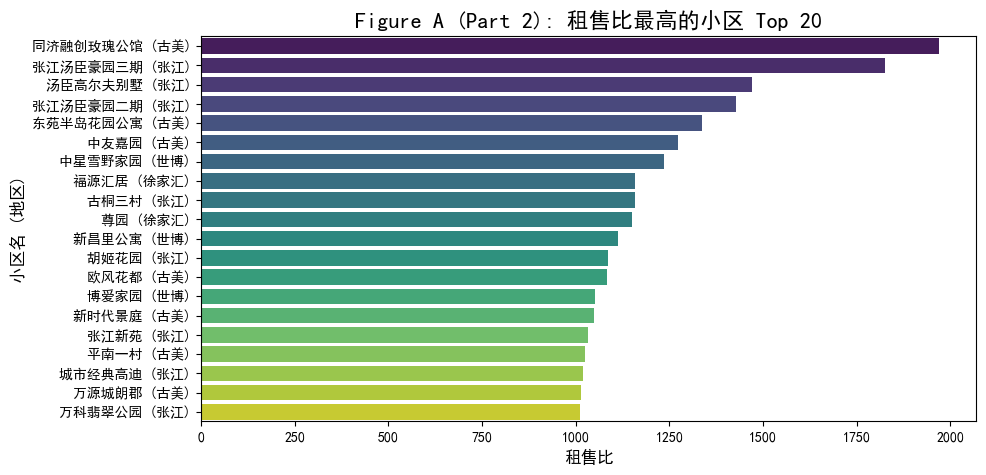

In [37]:
# Figure A: 绘制租售比条形图 -
# Part 1: 按地区看平均租售比
region_ratio = df_merged.groupby('region')['price_to_rent_ratio_direct'].median().reset_index().sort_values('price_to_rent_ratio_direct', ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x='price_to_rent_ratio_direct', y='region', data=region_ratio, palette='viridis')
plt.title('Figure A (Part 1): 各地区租售比中位数对比', fontsize=16)
plt.xlabel('租售比 ', fontsize=12)
plt.ylabel('地区', fontsize=12)
plt.show()

# Part 2: 看具体小区的租售比 Top 20
df_plot_a = df_merged.sort_values('price_to_rent_ratio_direct', ascending=False).head(20)

plt.figure(figsize=(10, 5))
# 在Y轴标签上加入地区信息
y_labels_a = df_plot_a['community_name'] + " (" + df_plot_a['region'] + ")"
sns.barplot(x='price_to_rent_ratio_direct', y=y_labels_a, data=df_plot_a, palette='viridis')
plt.title('Figure A (Part 2): 租售比最高的小区 Top 20', fontsize=16)
plt.xlabel('租售比', fontsize=12)
plt.ylabel('小区名 (地区)', fontsize=12)
plt.show()

task2:基础线性模型

In [20]:
common_communities = df_merged['community_name'].unique()
df_esf_model = df_esf_clean[df_esf_clean['community_name'].isin(common_communities)].copy()
df_zu_model = df_zu_clean[df_zu_clean['community_name'].isin(common_communities)].copy()

model1 = smf.ols('price_per_sqm ~ area_sqm + C(community_name)', data=df_esf_model).fit()
model2 = smf.ols('rent_per_sqm ~ area_sqm + C(community_name)', data=df_zu_model).fit()

predict_df = df_esf_model.groupby(['region', 'community_name'])['area_sqm'].median().reset_index()

predict_df['predicted_price_sqm'] = model1.predict(predict_df)
predict_df['predicted_rent_sqm'] = model2.predict(predict_df)
predict_df['price_to_rent_ratio_model'] = predict_df['predicted_price_sqm'] / predict_df['predicted_rent_sqm'] 


C:\Users\Rh\AppData\Local\Temp\ipykernel_80928\3445999603.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price_to_rent_ratio_model', y='region', data=region_ratio, palette='plasma')


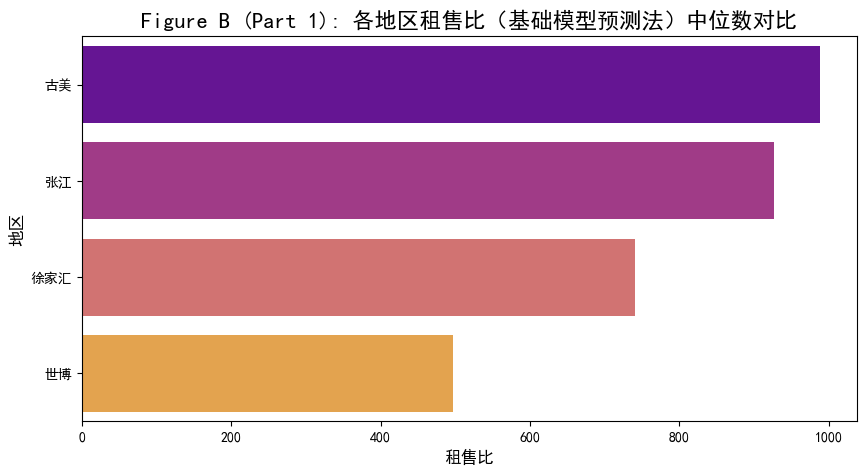

C:\Users\Rh\AppData\Local\Temp\ipykernel_80928\3445999603.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price_to_rent_ratio_model', y=y_labels_b, data=df_plot_b, palette='plasma')


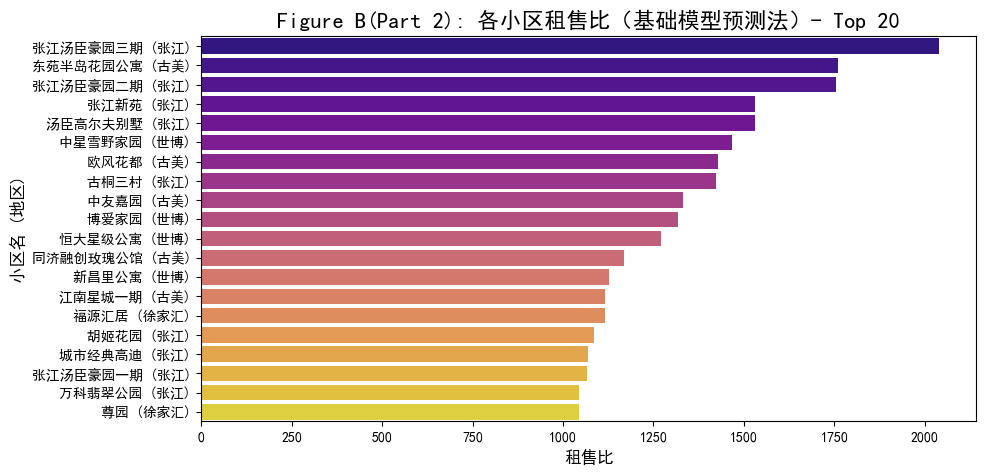

In [39]:
# Figure B:按地区租售比与top20

region_ratio = predict_df.groupby('region')['price_to_rent_ratio_model'].median().reset_index().sort_values('price_to_rent_ratio_model', ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x='price_to_rent_ratio_model', y='region', data=region_ratio, palette='plasma')
plt.title('Figure B (Part 1): 各地区租售比（基础模型预测法）中位数对比', fontsize=16)
plt.xlabel('租售比', fontsize=12)
plt.ylabel('地区', fontsize=12)
plt.show()


df_plot_b = predict_df.sort_values('price_to_rent_ratio_model', ascending=False).head(20)
plt.figure(figsize=(10, 5))
y_labels_b = df_plot_b['community_name'] + " (" + df_plot_b['region'] + ")"
sns.barplot(x='price_to_rent_ratio_model', y=y_labels_b, data=df_plot_b, palette='plasma')
plt.title('Figure B(Part 2): 各小区租售比（基础模型预测法）- Top 20', fontsize=16)
plt.xlabel('租售比', fontsize=12)
plt.ylabel('小区名 (地区)', fontsize=12)
plt.show()

task3:高级模型与对比

In [44]:
# Model 1+: 增加面积二次项，以及面积与地区的交互项
formula_plus = 'price_per_sqm ~ area_sqm + I(area_sqm**2) + C(community_name) + area_sqm:C(region)'
model1_plus = smf.ols(formula_plus, data=df_esf_model).fit()

formula_plus_rent = 'rent_per_sqm ~ area_sqm + I(area_sqm**2) + C(community_name) + area_sqm:C(region)'
model2_plus = smf.ols(formula_plus_rent, data=df_zu_model).fit()

In [46]:
#  R² 对比 ---
r2_comparison = pd.DataFrame({
    'Model': ['Model 1 (Price)', 'Model 1+ (Price)', 'Model 2 (Rent)', 'Model 2+ (Rent)'],
    'R-squared': [model1.rsquared, model1_plus.rsquared, model2.rsquared, model2_plus.rsquared],
    'Adj. R-squared': [model1.rsquared_adj, model1_plus.rsquared_adj, model2.rsquared_adj, model2_plus.rsquared_adj]
})
print(r2_comparison)


              Model  R-squared  Adj. R-squared
0   Model 1 (Price)   0.876976        0.867767
1  Model 1+ (Price)   0.884283        0.875405
2    Model 2 (Rent)   0.627515        0.605476
3   Model 2+ (Rent)   0.674752        0.655037


Model+ 的 Adj. R-squared 会更高，因为地区交互项捕捉到了新的、有意义的变化。

C:\Users\Rh\AppData\Local\Temp\ipykernel_80928\1334648111.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price_to_rent_ratio_model_plus', y='region', data=region_ratio_plus, palette='magma')


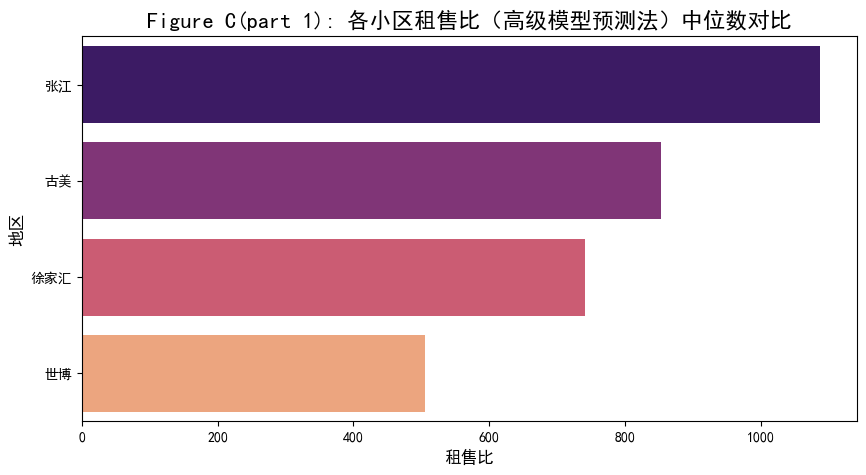

C:\Users\Rh\AppData\Local\Temp\ipykernel_80928\1334648111.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price_to_rent_ratio_model_plus', y=y_labels_c, data=df_plot_c, palette='magma')


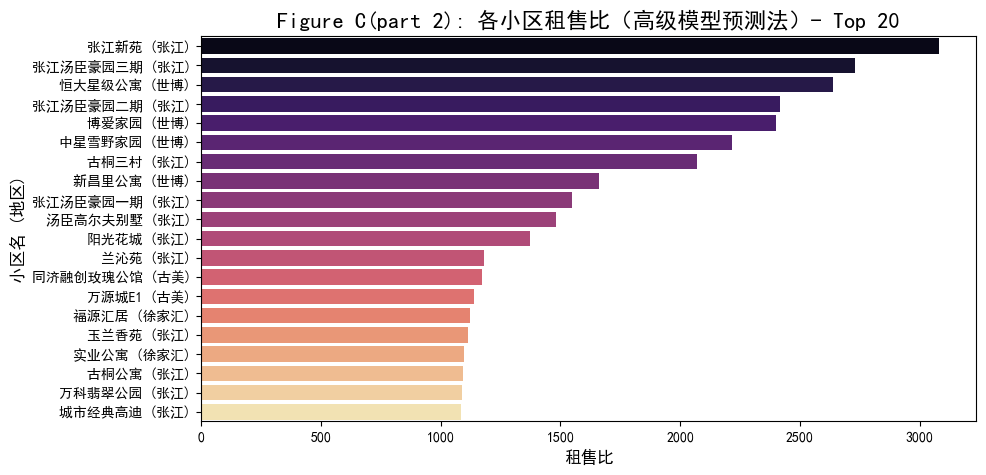

In [54]:
predict_df['predicted_price_sqm_plus'] = model1_plus.predict(predict_df)
predict_df['predicted_rent_sqm_plus'] = model2_plus.predict(predict_df)
predict_df['price_to_rent_ratio_model_plus'] = predict_df['predicted_price_sqm_plus'] / predict_df['predicted_rent_sqm_plus'] 


region_ratio_plus = predict_df.groupby('region')['price_to_rent_ratio_model_plus'].median().reset_index().sort_values('price_to_rent_ratio_model_plus', ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x='price_to_rent_ratio_model_plus', y='region', data=region_ratio_plus, palette='magma')
plt.title('Figure C(part 1): 各小区租售比（高级模型预测法）中位数对比', fontsize=16)
plt.xlabel('租售比', fontsize=12)
plt.ylabel('地区', fontsize=12)
plt.show()


df_plot_c = predict_df.sort_values('price_to_rent_ratio_model_plus', ascending=False).head(20)
plt.figure(figsize=(10, 5))
y_labels_c = df_plot_c['community_name'] + " (" + df_plot_c['region'] + ")"
sns.barplot(x='price_to_rent_ratio_model_plus', y=y_labels_c, data=df_plot_c, palette='magma')
plt.title('Figure C(part 2): 各小区租售比（高级模型预测法）- Top 20', fontsize=16)
plt.xlabel('租售比', fontsize=12)
plt.ylabel('小区名 (地区)', fontsize=12)
plt.show()

对比

In [83]:
final_comparison = df_merged[['region', 'community_name', 'esf_count', 'zu_count', 'price_to_rent_ratio_direct']]
final_comparison = pd.merge(final_comparison, predict_df[['community_name', 'price_to_rent_ratio_model', 'price_to_rent_ratio_model_plus']], on='community_name')

print("\n----------- 三种方法计算的租售比对比 (部分数据) -----------")
print(final_comparison.head())


----------- 三种方法计算的租售比对比 (部分数据) -----------
  region community_name  esf_count  zu_count  price_to_rent_ratio_direct  \
0     世博         万科金色城品          3         4                  620.051538   
1     世博           上南一村         24        34                  435.958308   
2     世博           上南七村         10        20                  383.443333   
3     世博           上南三村         20        14                  417.436385   
4     世博           上南九村         71        46                  538.598898   

   price_to_rent_ratio_model  price_to_rent_ratio_model_plus  
0                 675.919208                      757.601910  
1                 452.572156                      472.452156  
2                 385.484391                      397.563047  
3                 406.791311                      421.715983  
4                 534.149228                      555.895053  


In [87]:
final_comparison.head(60)

,region,community_name,esf_count,zu_count,price_to_rent_ratio_direct,price_to_rent_ratio_model,price_to_rent_ratio_model_plus
0,世博,万科金色城品,3,4,620.051538,675.919208,757.601910
1,世博,上南一村,24,34,435.958308,452.572156,472.452156
2,世博,上南七村,10,20,383.443333,385.484391,397.563047
3,世博,上南三村,20,14,417.436385,406.791311,421.715983
4,世博,上南九村,71,46,538.598898,534.149228,555.895053
5,世博,上南二村,13,48,408.724364,406.778211,423.942914
6,世博,上南五村,13,39,438.813187,427.439760,436.849788
7,世博,上南八村,29,8,478.246339,412.271255,415.634921
8,世博,上南六村,37,42,395.513500,405.863564,399.241007
9,世博,上南十一村,10,11,546.392368,467.733346,496.204437
